<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/Ufairah_Damara_Bashir_H071201091_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data  citra

### 1. import library

In [ ]:
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Import image

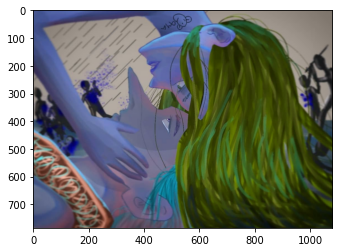

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CV/PORTOFOLIO/2D/ARTWORKS/aku mengalah.jpg')
plt.imshow(image)

karena warnanya bersifat negative, maka saya menggunakan COLOR_BGR2RGB untuk mengubah warnanya kembali ke semula

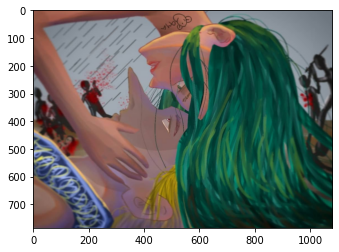

In [ ]:
image_cvtresult = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_cvtresult)

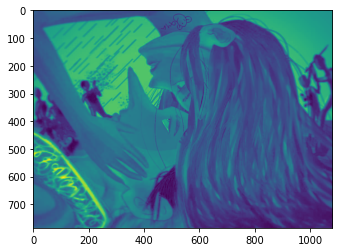

In [ ]:
r,g,b = cv2.split(image_cvtresult)
plt.imshow(b)

In [ ]:
image_array = img_to_array(image_cvtresult)
print(image_array)

[[[144.  86.  72.]
  [144.  86.  72.]
  [144.  86.  72.]
  ...
  [106. 115. 124.]
  [106. 115. 124.]
  [106. 115. 124.]]

 [[144.  86.  72.]
  [144.  86.  72.]
  [144.  86.  72.]
  ...
  [106. 115. 124.]
  [106. 115. 124.]
  [106. 115. 124.]]

 [[144.  86.  72.]
  [144.  86.  72.]
  [144.  86.  72.]
  ...
  [106. 115. 124.]
  [106. 115. 124.]
  [106. 115. 124.]]

 ...

 [[112.  85.  90.]
  [110.  85.  88.]
  [111.  84.  89.]
  ...
  [ 18.  31.  22.]
  [ 18.  31.  22.]
  [ 18.  31.  22.]]

 [[110.  88.  91.]
  [110.  88.  91.]
  [110.  88.  91.]
  ...
  [ 18.  31.  22.]
  [ 18.  31.  22.]
  [ 18.  31.  22.]]

 [[108.  92.  95.]
  [109.  93.  96.]
  [109.  93.  96.]
  ...
  [ 17.  33.  23.]
  [ 17.  33.  23.]
  [ 16.  32.  22.]]]


<function matplotlib.pyplot.show>

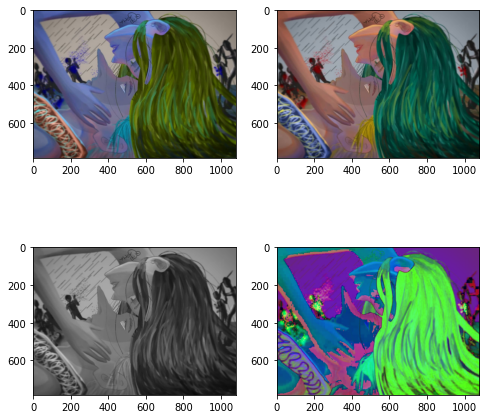

In [ ]:
fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.imshow(image)

ax = fig.add_subplot(2, 2, 2)
plt.imshow(image_cvtresult)

ax = fig.add_subplot(2, 2, 3)
plt.imshow(image_grayscale)

ax = fig.add_subplot(2, 2, 4)
plt.imshow(image_hsv)

plt.show

<function matplotlib.pyplot.show>

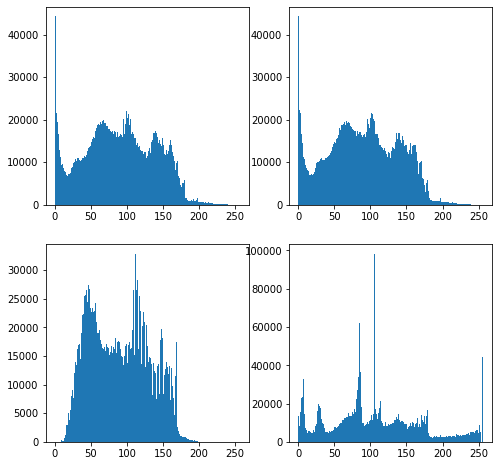

In [ ]:
fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.hist(image.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 2)
plt.hist(image_cvtresult.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 3)
plt.hist(image_grayscale.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 4)
plt.hist(image_hsv.ravel(),256,[0,256])

plt.show

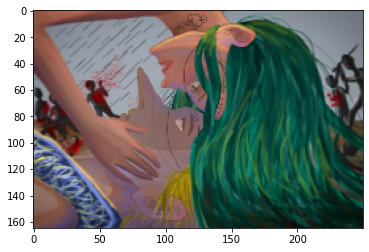

In [ ]:
image_resize = cv2.resize(image_cvtresult, (250, 165))
plt.imshow(image_resize)

In [ ]:
base_directory = '/content/'
augmented_directory = os.path.join(base_directory, "augmented_result")
os.mkdir(augmented_directory)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.5
)

In [ ]:
path = "/content/drive/MyDrive/CV/PORTOFOLIO/2D/ARTWORKS"
size = 150
dataset = []
image_dir = os.listdir(path)

img = io.imread(f"{path}/{image_dir[0]}")
img = Image.fromarray(img, 'RGB')
img = img.resize((size, size))
dataset.append(np.array(img))
x = np.array(dataset)

In [ ]:
i = 0
for j in datagen.flow(x, batch_size = 32,
                      save_to_dir = "/content/augmented_result/",
                      save_prefix = "aug_rslt",
                      save_format = "png"):

  i += 1
  if i > 30:
    break

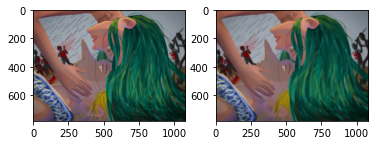

In [ ]:
image1 = cv2.GaussianBlur(image_cvtresult, (3,3), 0)
rgb_dst = cv2.fastNlMeansDenoisingColored(image1, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(image_cvtresult)
plt.subplot(122),plt.imshow(rgb_dst)

plt.show()

## 2. Data Text

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import cv2
from matplotlib import pyplot as plt

### a. tokenisasi dengan Library TF

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words= 20, oov_token='-')

In [ ]:
teks = ["Saya dipanggil Ara",
        "Ara suka membaca dan makan indomie",
        "Ara sering tidur siang",
        "Ara suka menggambar"]

In [ ]:
tokenizer.fit_on_texts(teks)

In [ ]:
sequences = tokenizer.texts_to_sequences(teks)

In [ ]:
print(tokenizer.word_index)

{'-': 1, 'ara': 2, 'suka': 3, 'saya': 4, 'dipanggil': 5, 'membaca': 6, 'dan': 7, 'makan': 8, 'indomie': 9, 'sering': 10, 'tidur': 11, 'siang': 12, 'menggambar': 13}


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequence_SameLength = pad_sequences(sequences)

In [ ]:
print(sequence_SameLength)

[[ 0  0  0  4  5  2]
 [ 2  3  6  7  8  9]
 [ 0  0  2 10 11 12]
 [ 0  0  0  2  3 13]]


### b. Tokenizer dengan library NLTK

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
text2 = "Saya ingin jadi anak non procrastinating"

In [ ]:
tokenizer_using_nltk = nltk.word_tokenize(text2)

In [ ]:
print(tokenizer_using_nltk)

['Saya', 'ingin', 'jadi', 'anak', 'non', 'procrastinating']


## Data Audio

In [ ]:
import librosa
audio_data = '/content/drive/MyDrive/WORK/PERKULIAHAN/semester3/FINNEAS - Break My Heart Again (Official Audio) Z0LudN1DsGs.m4a'
x , sr = librosa.load(audio_data)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
import IPython.display as idp
idp.Audio(audio_data)

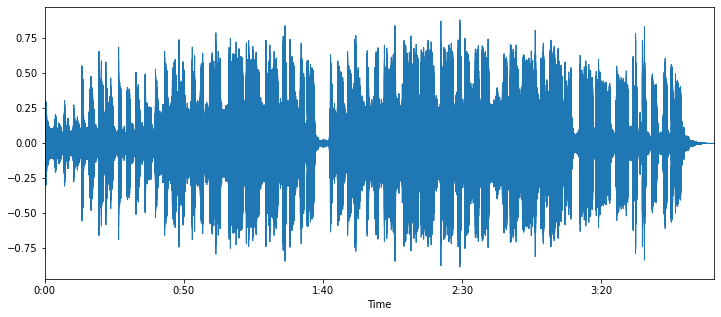

In [ ]:
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveplot(x, sr=sr)

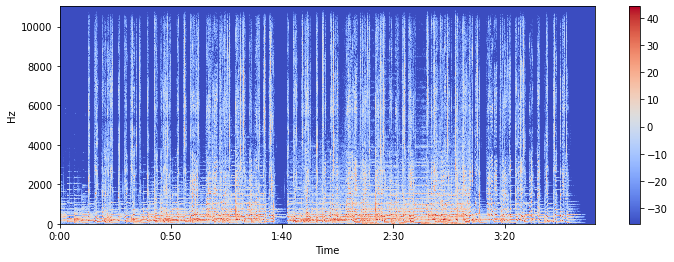

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(12, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

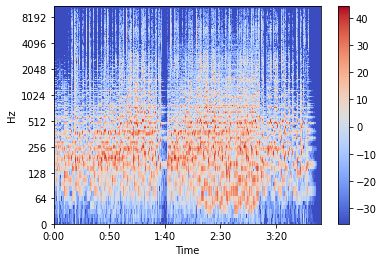

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

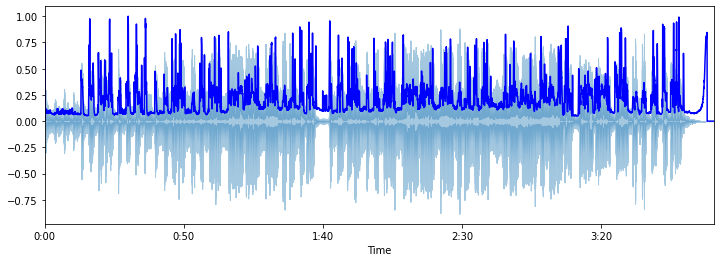

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

code di atas menyajikan gambar dengan tampilan warna biru

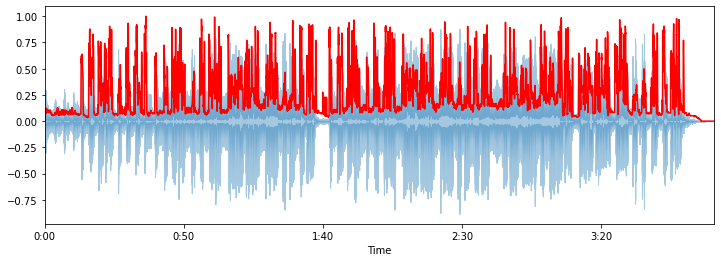

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

code di atas menyajikan gambar dengan tampilan warna merah

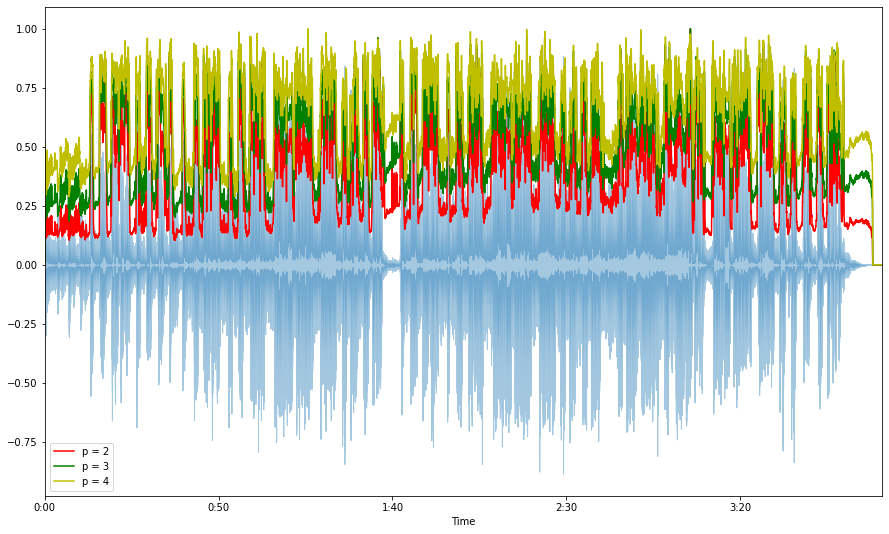

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


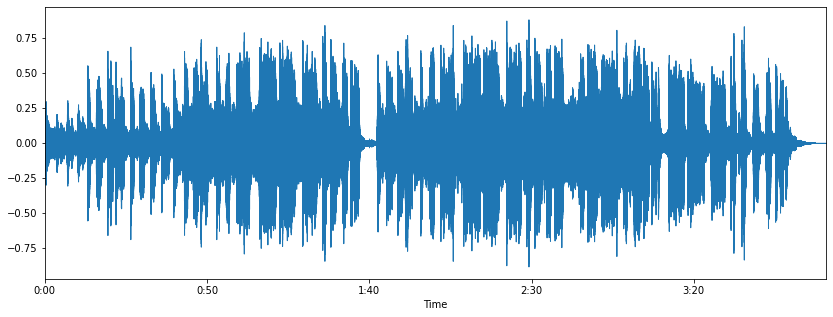

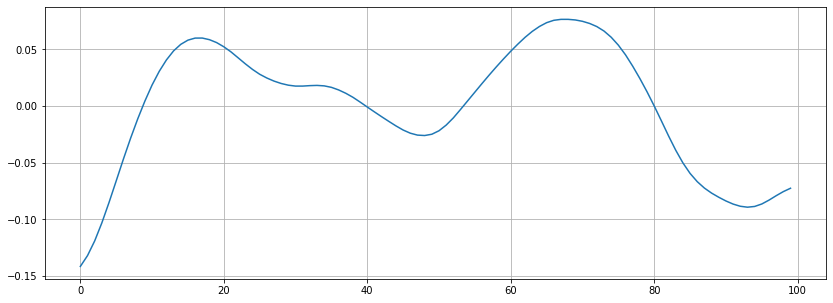

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/WORK/PERKULIAHAN/semester3/FINNEAS - Break My Heart Again (Official Audio) Z0LudN1DsGs.m4a')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

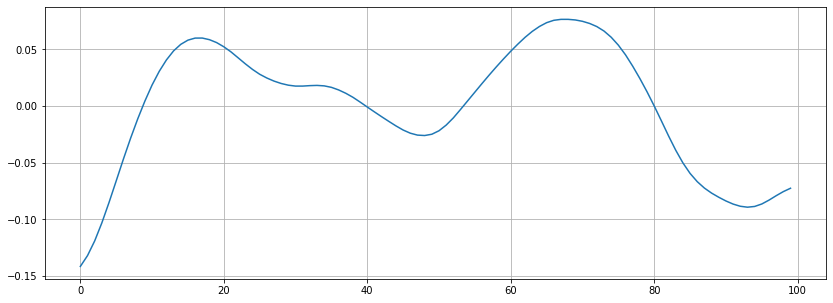

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

4
